<a href="https://colab.research.google.com/github/SamamaSaleem/Natural-Language-Processing-Text-Classification/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing

#### Importing the libraries

In [191]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Importing the dataset

In [192]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

#### Cleaning the texts

In [193]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)
print(corpus)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

#### Creating the Bag of Words model

In [194]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

#### Splitting the dataset into the Training set and Test set

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#### Partial Classifiers (NB, SVM, RF, LR, KNN) for calculating Improved Weight

In [196]:
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.naive_bayes import GaussianNB
classifierNB = GaussianNB()
classifierNB.fit(X_train, y_train)
weightNB = accuracy_score(y_test, classifierNB.predict(X_test))

from sklearn.svm import SVC
classifierSVM = SVC(kernel = 'linear', random_state = 0)
classifierSVM.fit(X_train, y_train)
weightSVM = accuracy_score(y_test, classifierSVM.predict(X_test))

from sklearn.ensemble import RandomForestClassifier
classifierRF = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 42)
classifierRF.fit(X_train, y_train)
weightRF = accuracy_score(y_test, classifierRF.predict(X_test))

from sklearn.linear_model import LogisticRegression
classifierLR = LogisticRegression(random_state = 0)
classifierLR.fit(X_train, y_train)
weightLR = accuracy_score(y_test, classifierLR.predict(X_test))

from sklearn.neighbors import KNeighborsClassifier
classifierKNN = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifierKNN.fit(X_train, y_train)
weightKNN = accuracy_score(y_test, classifierKNN.predict(X_test))

In [197]:
weightAll = weightKNN + weightLR + weightNB + weightRF + weightSVM
tresshold = .4
y_pred = 1 * (weightNB * classifierNB.predict(X_test) +
              weightRF * classifierRF.predict(X_test) +
              weightLR * classifierLR.predict(X_test) +
              weightKNN * classifierKNN.predict(X_test) +
              weightSVM * classifierSVM.predict(X_test))> tresshold * weightAll

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[79 18]
 [19 84]]


0.815

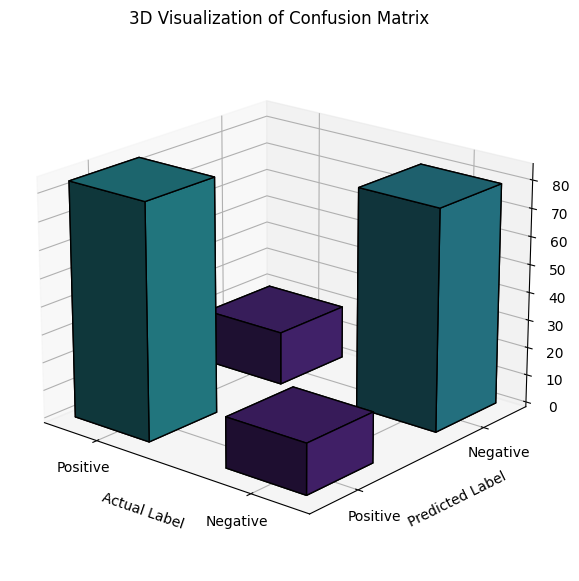

In [198]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Initialize the 3D figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Define the positions and sizes of the bars
xpos, ypos = np.meshgrid(np.arange(cm.shape[0]), np.arange(cm.shape[1]), indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = np.zeros_like(xpos)

dx = dy = 0.5  # Size of each bar
dz = cm.ravel()

# Create color mapping for each bar
colors = plt.cm.viridis(0.45*dz / np.max(dz))  # Normalized colors based on the value

# Plot the 3D bars
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', color=colors, edgecolor='black')

# Add axis labels with more descriptive names
ax.set_xlabel('Actual Label')
ax.set_ylabel('Predicted Label')
ax.set_zlabel('Count')

# Set the tick labels to represent the confusion matrix indices
ax.set_xticks(np.arange(cm.shape[0]) + dx / 2)
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_yticks(np.arange(cm.shape[1]) + dy / 2)
ax.set_yticklabels(['Negative', 'Positive'])

# Improve the title
plt.title('3D Visualization of Confusion Matrix')

# Rotate the view angle for better visualization
ax.view_init(elev=20, azim=130)

# Show the plot
plt.show()